<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [500]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aufgabe 5: Interpretation von Modellen

## a) Lesen Sie den Datensatz Hdma.csv ein und machen Sie sich mit den Daten vertraut.

In [501]:
import pandas as pd
import os


In [502]:
DATA_PATH = "/content/drive/MyDrive/PDSA/ÜB1/dataset"

In [503]:
df = pd.read_csv(os.path.join(DATA_PATH,"Hdma.csv"),sep=';')

In [504]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


### **Beschreibung der Variablen und klarere Umbennenung der Variablen**


| Orginal Variable    | Beschreibung | Umbennenung Variable |
| ----------- | ----------- | ----------- |
| dir     | debt payments to total income ratio      | debt_payments_to_total_income_ratio      |
| hir   | housing expenses to income ratio        | housing_expenses_to_income_ratio      |
| lvr      | ratio of size of loan to assessed value of property      | size_of_loan_to_assessed_value_of_property_ratio      |
| ccs   | consumer credit score from 1 to 6 (a low value being a good score)        | consumer_credit_score      |
| mcs      | mortgage credit score from 1 to 4 (a low value being a good score)      | mortgage_credit_score_from      |
| pbcr   | public bad credit record?        | public_bad_credit_record      |
| dmi   | denied mortgage insurance ?       | denied_mortgage_insurance      |
| self      | self employed?       | self_employed      |
| single   | is the applicant single?      | single      |
| uria      | 1989 Massachusetts unemployment rate in the applicant’s industry       | unemployment_rate_in_the_applicant’s_industry      |
| condominium   | is unit a condominium?        | condominium      |
| black      | is the applicant black?       | black      |
| deny   | mortgage application denied?        | deny      |

In [505]:
# Umbennenung der Variablen
new_column_names = ["_".join("debt payments to total income ratio".split()),
"_".join("housing expenses to income ratio".split()),
 "_".join("size of loan to assessed value of property ratio".split()),
 "_".join("consumer credit score".split()),
 "_".join("mortgage credit score".split()),
 "_".join("public bad credit record".split()),
 "_".join("denied mortgage insurance".split()),
 "_".join("self employed".split()),
 "_".join("single".split()),
 "_".join("unemployment rate in the applicant’s industry".split()),
 "_".join("condominium".split()),
 "_".join("black".split()),
 "_".join("deny".split())]


df.columns = new_column_names

In [506]:
# Vorschau der Rohdaten
df.head()

,debt_payments_to_total_income_ratio,housing_expenses_to_income_ratio,size_of_loan_to_assessed_value_of_property_ratio,consumer_credit_score,mortgage_credit_score,public_bad_credit_record,denied_mortgage_insurance,self_employed,single,unemployment_rate_in_the_applicant’s_industry,condominium,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [507]:
# Anzeigen der Datentypen der einzelnen Spalten des DataFrames und checken ob NaNs vorliegen (auf NaNs wird in Teilaufgabe c weiter eingegangen)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   debt_payments_to_total_income_ratio               2381 non-null   float64
 1   housing_expenses_to_income_ratio                  2381 non-null   float64
 2   size_of_loan_to_assessed_value_of_property_ratio  2381 non-null   float64
 3   consumer_credit_score                             2381 non-null   float64
 4   mortgage_credit_score                             2381 non-null   float64
 5   public_bad_credit_record                          2380 non-null   object 
 6   denied_mortgage_insurance                         2381 non-null   object 
 7   self_employed                                     2380 non-null   object 
 8   single                                            2381 non-null   object 
 9   unemployment_rate_i

In [508]:
#Ausgabe von statistischen Standardparametern für die numerischen Werte
df.describe()

,debt_payments_to_total_income_ratio,housing_expenses_to_income_ratio,size_of_loan_to_assessed_value_of_property_ratio,consumer_credit_score,mortgage_credit_score,unemployment_rate_in_the_applicant’s_industry,condominium
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


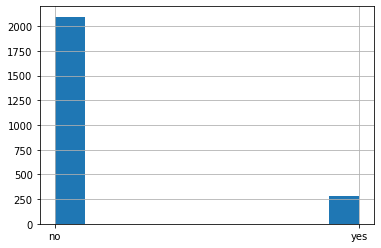

In [509]:
# Ausgabe der Klassenverteilung des Targets (die hier zu sehende Class Imbalance wird in Teilaufgabe d und besonders in Teilaufgabe e aufgegriffen)
df.deny.hist()

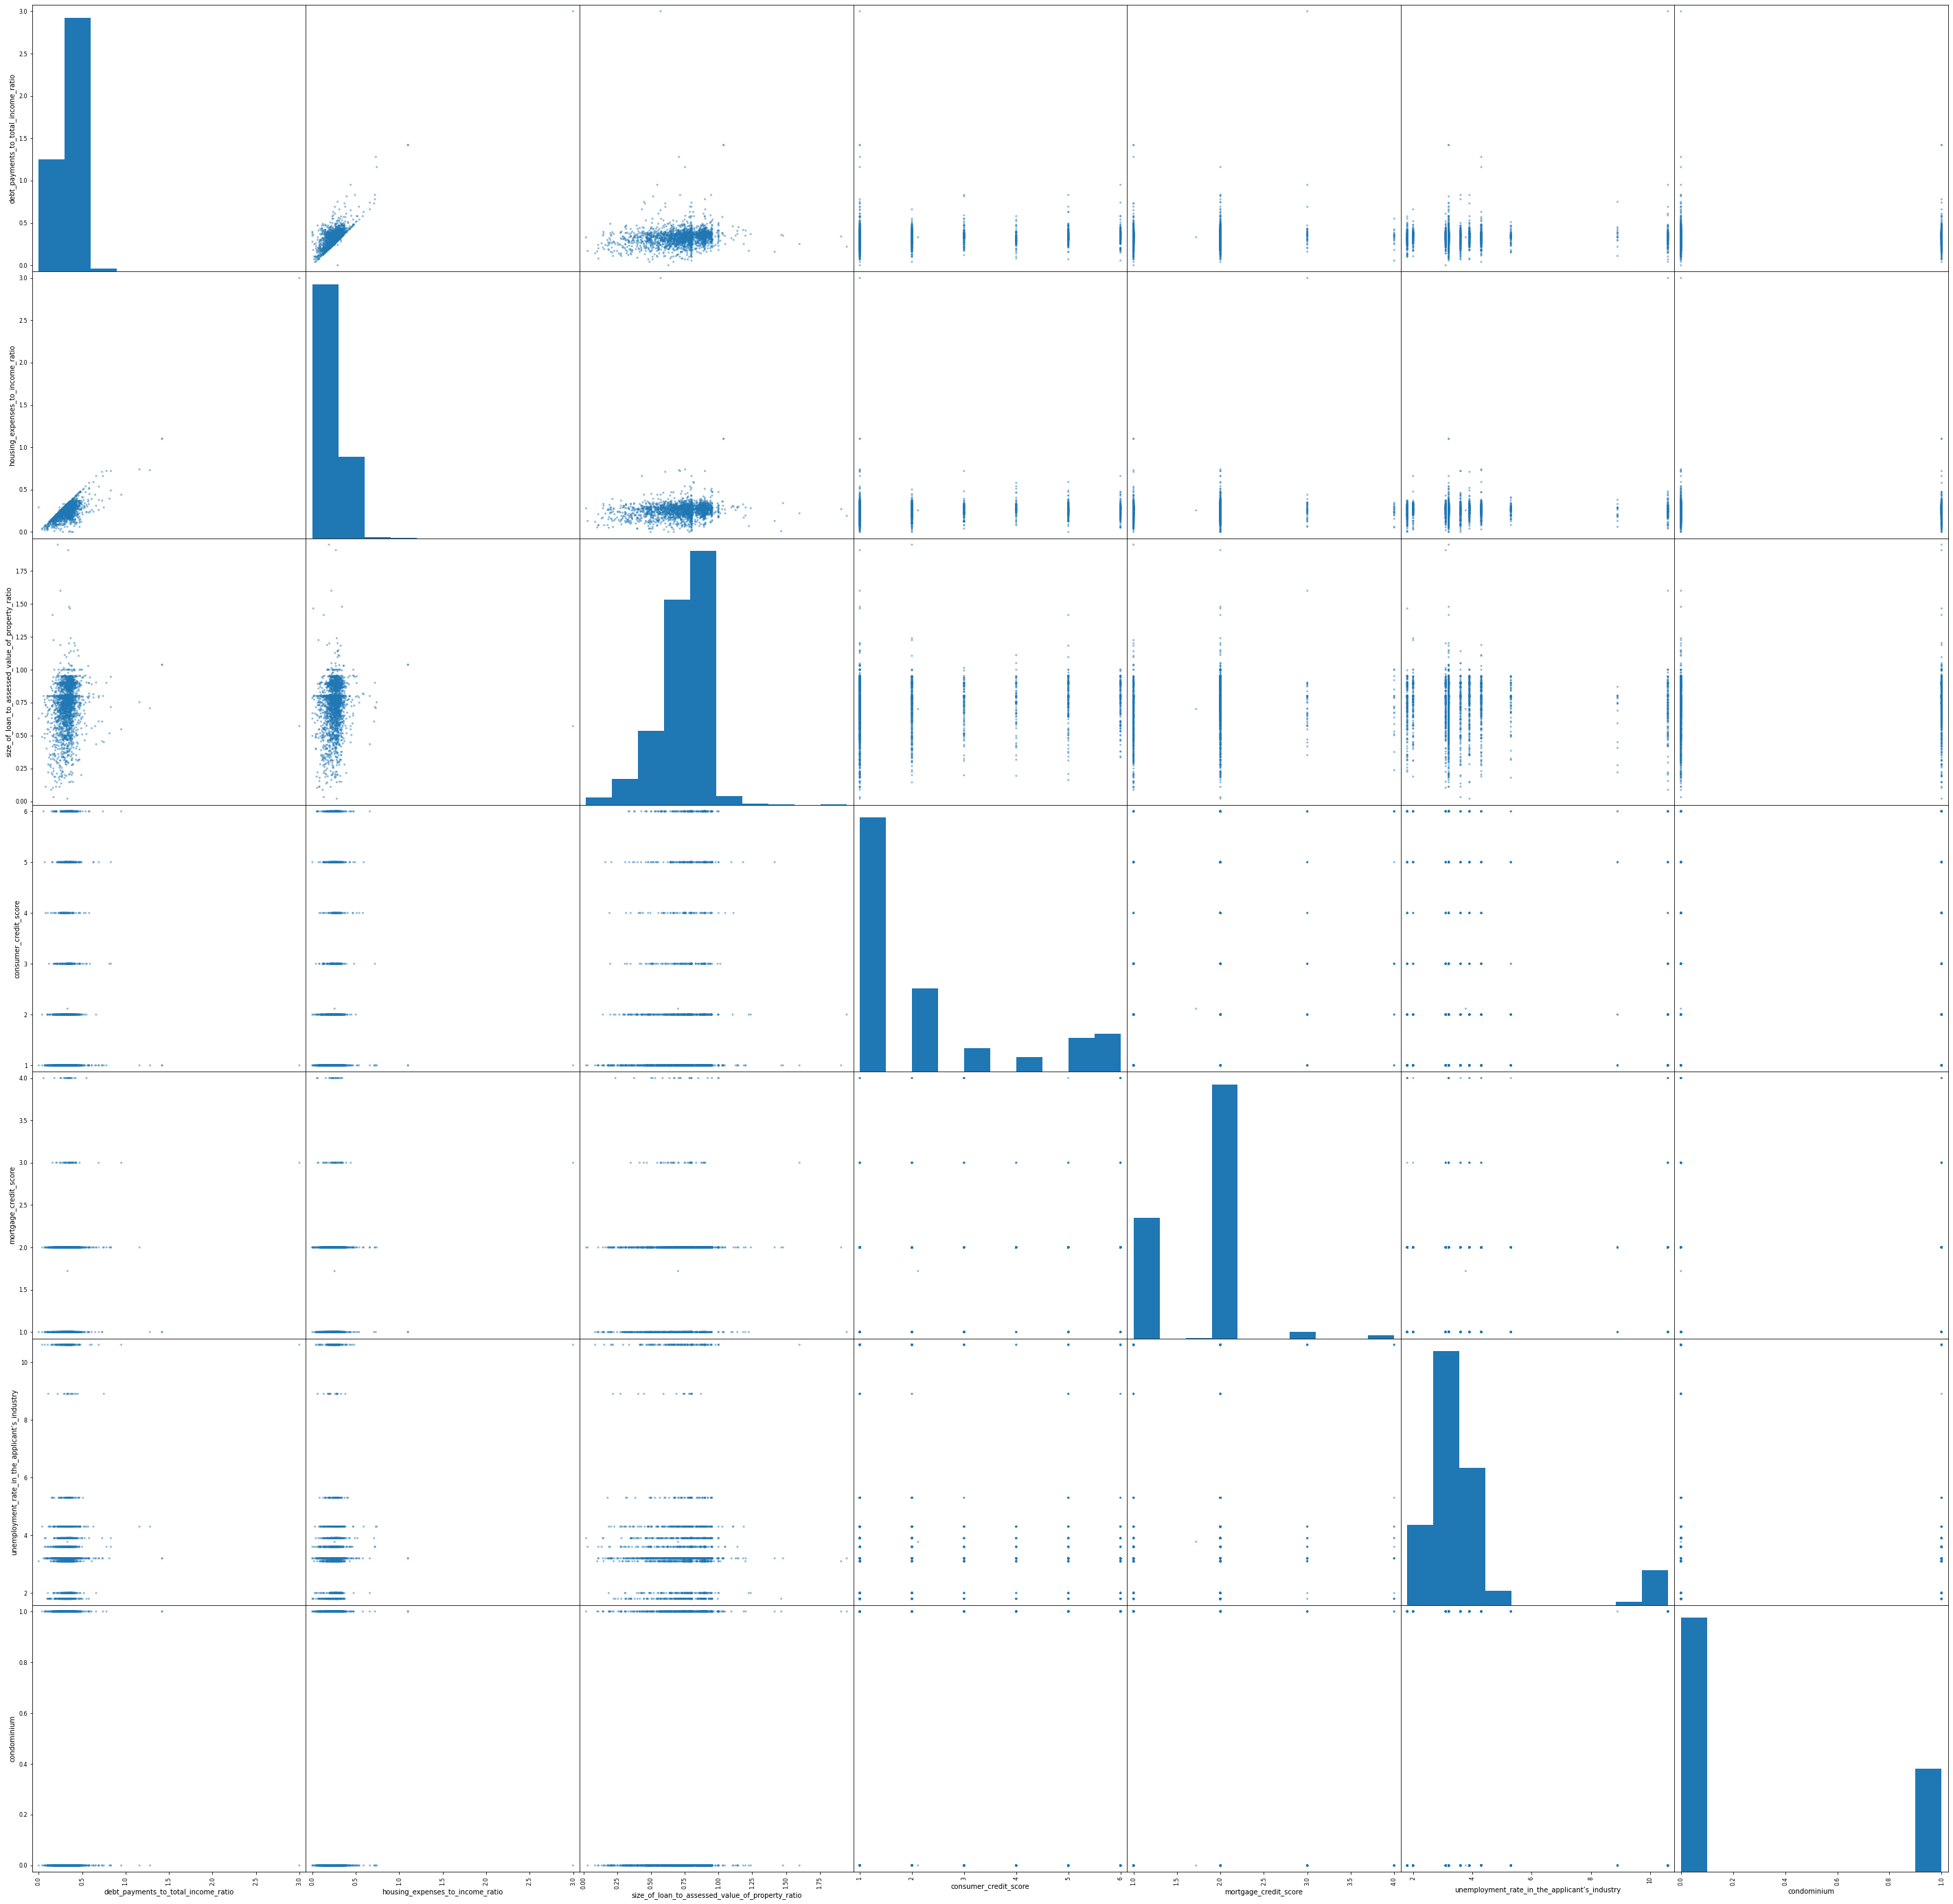

In [510]:
# Anzeigen des Zusammenhangs der Features untereinander und mit dem Target deny
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(50,50))
plt.show()

Anhand der obigen Scatter Plots kann man sehen, dass keine linearen Korrelationen zwischen den Featuren und dem Target vorliegen. Lediglich zwischen den Featuren **debt_payments_to_total_income_ratio** und **housing_expenses_to_income_ratio** scheint es einen lineare Korrelation zu geben. Dies findet in Teilaufgabe c weitere Beachtung

Aufgrund der binären Auspräung des Targets und obiger Scatter Matrix macht es keinen Sinn Korrelationsmethoden wie Pearson, Spearman und Kendall Korrelation zu untersuchen, denn es scheint keinen Zusammenhang à la "wenn x steigt, dann" zu geben.

## b) Volkswirtschaftler möchten herausfinden, was die möglichen Einflussfaktoren auf die Ablehnung eines Kreditantrags sind, und ob es eine rassistische Diskriminierung gibt. Welcher Typ von Aufgabe des maschinellen Lernens ist für diese Aufgabe geeignet? Welche Methoden kann man benutzen?


Grundsätzlich kann die Aufgabe der Feature Selection im Maschninellen Lernen Auskunft darüber geben wie groß der Einflussfaktor einzelner Features auf die Target Variable ist. Zum Beispiel eignen sich die Klassen im [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) Modul um disen Zusammenhang zu untersuchen. Eine Methode um hiermit den Zusammenhang zwischen Featuren und der Target Variable zu untersuchen ist die Nutzung von statistischen Tests. Die Art des anzuwendenden statistischen Tests richtet sich nach dem Datentyp (categorical, ordinal und numeric) des Features (siehe Aufgabe 4). 

Eine weitere Methode findet sich in der Betrachtung von Decision Tree Algorithmen. Hierbei kann das Auswahlkriterium zur Aufteilung der Daten (z.B. der Information Gain) eines Features genutzt werden um Aussagen über den Einfluss dieses Features auf die Target Variable zu machen. Decision Trees sind nämlich genau nach dem Prinzip aufgebaut, dass die Features mit dem größten Einfluss näher an der Wurzel lokalisiert sind. Beispielsweise kann man in sklearn über das feature_importances_ Attribut eines Entscheidungsbaum auf diese Größe zugreifen.

Wie wir in Teilaufgabe d sehen werden kann man darüberhinaus anhand der Koeffizienten einer logistischen Regression ebenfalls den Einfluss der Features auf das Target quantifizieren. 


Mit den oben vorgestellten Methoden kann der Zusammenhang zwischen dem Feature **black** und dem Target **deny** ermittelt werden. Daraus kann man ableiten ob eine rassistische Diskrimierung vorliegt.

Anhang: neben den oben beschriebenen Methoden um die Wichtigkeit von Featuren auf das Target zu bemessen gibt es noch weitere auf die aber nicht genauer eingegangen wird. Zum Beispiel lässt sich hier die Permutation Feature Importance nennen (https://scikit-learn.org/stable/modules/permutation_importance)



## c) Ist Datenvorverarbeitung nötig? Warum? Falls nötig, verarbeiten Sie die Daten vor.

In der obigen Ausgabe von df.info() haben wir gesehen, dass es zwei Attribute mit einer NaN Ausprägung gibt. Die zugehörigen Beobachtungen werden wir aus dem Datensatz löschen, da diese in ML Algorithmen Probleme verursachen können.




In [511]:
#Beobachtung mit NaN Ausprägung ausfindig machen und aus dem Datensatz löschen
import numpy as np
df[df.isin([np.nan]).any(1)]
df = df.dropna()

Darüberhinaus sollten die Daten skaliert werden, da Unterschiede in dem Ausprägungsbereich der Daten Einfluss auf die Performanz der ML-Algorithmen haben können. Wir skalieren die numerischen Variablen in das Intervall [0:1].

In [512]:
# Anwendung von sklearns MinMaxScaler und Wiederherstellung unseres DataFrames
from sklearn.preprocessing import MinMaxScaler

columns_to_be_scaled = [columns for columns in df.columns if df[columns].dtype == "float64" ]
df_to_be_scaled = df[columns_to_be_scaled]

minmax_scaler = MinMaxScaler()
saved_column_names = df_to_be_scaled.columns
data_scaled_minmax = minmax_scaler.fit_transform(df_to_be_scaled)
df_scaled = pd.DataFrame(data_scaled_minmax, columns=saved_column_names)

for column in saved_column_names:
  df[column] = df_scaled[column]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Für einige der statistischen Tests und für viele der ALG in Teilaufgabe d und f ist es notwendig die nominalen Daten mit den Ausprägungen "yes" und "no" in numerische Daten ("0" bzw. "1") umzuwandeln. Dies trifft auf folgende Features zu: **public_bad_credit_record, denied_mortgage_insurance, self_employed, single, unemployment_rate_in_the_applicant’s_industry, black**. Und das Target: **deny**.


In [513]:
#Transformieren von nominalen Daten in numerische Daten

yes_no_to_int = {"yes": 1, "no": 0}

for column in df.columns:
 if df[column].dtype == "object":
    df[column] = df[column].map(yes_no_to_int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   debt_payments_to_total_income_ratio               2380 non-null   float64
 1   housing_expenses_to_income_ratio                  2380 non-null   float64
 2   size_of_loan_to_assessed_value_of_property_ratio  2380 non-null   float64
 3   consumer_credit_score                             2380 non-null   float64
 4   mortgage_credit_score                             2380 non-null   float64
 5   public_bad_credit_record                          2380 non-null   int64  
 6   denied_mortgage_insurance                         2380 non-null   int64  
 7   self_employed                                     2380 non-null   int64  
 8   single                                            2380 non-null   int64  
 9   unemployment_rate_i

In Teilaufgabe a in dem Scatterplot von **debt_payments_to_total_income_ratio** und **housing_expenses_to_income_ratio** haben wir gesehen, dass eine lineare Korrelation zwischen den beiden obigen Featuren vorliegt. Die Berechnung der Pearson Korrelation ergibt einen hohen Wert in Höhe von 0.78. Demnach wäre es sinnvoll eine der Variablen zu entfernen.

In [515]:
#Berechnung des Pearson Korrelationskoeffizienten für zwei voneinander abhänige Variablen und Entfernung einer der Variablen
df.debt_payments_to_total_income_ratio.corr(df.housing_expenses_to_income_ratio)
df = df.drop(columns="housing_expenses_to_income_ratio")

## d) Separieren Sie die Daten in 80% : 20% = Training : Test Datensatz. Führen Sie eine logistische Regression durch. Beschreiben Sie Koeffizienten und deren Signifikanzniveau sowie die Area Under Curve (AUC) der Receiver-Operator-Curve (ROC). Interpretieren Sie die Ergebnisse.

In [516]:
#Daten in Feature und Target separieren

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [517]:
#Aufteilen der Daten in einen Trainings- und einen Testdatensatz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )


In [518]:
# Unbalancierte Klassenverteilung des Targets wird balanciert mittels Oversampling (siehe Teilaufgabe e für eine Begründung dieses Schrittes)
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=0)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)


In [519]:
# Benutzung von Phyton's statsmodels Modul um eine logistische Regression durchzuführen und statistische Metriken auszugeben
import statsmodels.api as sm
log_regressor_statsmodels = sm.Logit(y_train, sm.add_constant(X_train)).fit()


Optimization terminated successfully.
         Current function value: 0.505675
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [520]:
#Darstellung der Parameter des logistischen Regressionsmodell und zugehörigen Signifikanzwerten in einem DataFrame
log_regressor_statsmodels_ergebnis_html = log_regressor_statsmodels.summary().tables[1].as_html()
log_regressor_ergebnis_statsmodels = pd.read_html(log_regressor_statsmodels_ergebnis_html, header=0, index_col=0)

#Entfernen der nicht relevanten Spalten
log_regressor_ergebnis_statsmodels = log_regressor_ergebnis_statsmodels[0].drop(columns=["z","[0.025","0.975]"])
 

#Koeffizienten sortieren in absteigender Reinfolge
log_regressor_ergebnis_statsmodels = log_regressor_ergebnis_statsmodels.sort_values(by="coef", ascending=False)

log_regressor_ergebnis_statsmodels

,coef,std err,P>|z|
debt_payments_to_total_income_ratio,14.0647,1.369,0.000
denied_mortgage_insurance,4.2625,0.511,0.000
size_of_loan_to_assessed_value_of_property_ratio,2.2633,0.497,0.000
public_bad_credit_record,1.4183,0.154,0.000
consumer_credit_score,1.3899,0.123,0.000
black,0.9678,0.111,0.000
single,0.5730,0.088,0.000
unemployment_rate_in_the_applicant’s_industry,0.4627,0.173,0.008
self_employed,0.4443,0.129,0.001
mortgage_credit_score,0.4165,0.247,0.091


### **Koeffizienten im logistischen Regressionsmodell**
Die Spalte **coef** in der obigen Tabelle stellt die Koeffizienten des logistischen Regressionsmodells dar. Um die Koeffizienten zu verstehen betrachten wir zunächst ein vereinfachtes logistische Regressionsmodell, welches nur die Attribute **single** und **black** betrachtet: <br><br> $logit(p)=0.3723*single+0.8590*black+const$,  mit $p = P(Y=1)$ aka der Wahrscheinlichkeit, dass der Kreditantrag abgelehnt wird. 

Auf der linken Seite der Gleichung haben steht $logit(p)$, weswegen die Koeffizienten der Attribute nicht intuitiv intepretiert werden können. Die Gleichungen werden wir im Folgenden soweit umformen, dass auf der linken Seite nur noch die Wahrscheinlichkeit p stehen wird ([Wer an einer Erläuterung der einzelnen Schritte interessiert ist kann sie hier nachlesen](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)).

1. $logit(p) = ln(\frac{p}{1-p})= 0.3723*single+0.8590*black+const$

2. $\frac{p}{1-p} = exp (0.3723*single+0.8590*black+const)$

3. $p = \frac{exp (0.3723*single+0.8590*black+const)}{1+exp (0.3723*single+0.8590*black+const}$


Angenommen für eine Beobachtung hat das Attribut **single** den Wert 1, **black** hat den Wert 0 und die Konstante hat ebenfalls den Wert 0. Dann beträgt die Wahrscheinlichkeit für eine Kreditablehnung $p=\frac{exp(0.3723)}{1+exp(0.3723)}=0.592$. Das heißt in diesem vereinfachten Fall erhöht die Eigenschaft das jemand single ist die Wahrscheinlichkeit für die Kreditablehnung von 0% auf 59.2%.

Die Funktion $p=\frac{exp(x)}{1+exp(x)}$ ist streng monoton steigend, weswegen man ableiten kann das Attribute mit positiven Koeffizienten positv mit der Kreditablehnungswahrscheinlichkeit p korrelieren (siehe Abbildung 1). Für Attribute mit negativen Vorzeichen verhält es sich genau andersherum. 



####Abbildung 1: Logistische Funktion
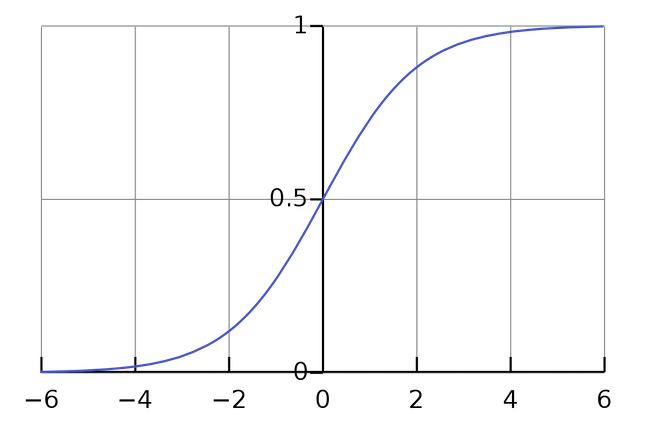

[Bilquelle](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)


### **Signifikanzniveau im logistischen Regressionsmodell**
Die Einschätzung der Signifikanz der ermittelten Koeffizienten der Attribute des logistischen Regressionsmodels kann mit Hilfe des p-Wertes erfolgen, welcher einem Hypothesentest zur Grund liegt.
Das Modul statsmodels ermöglicht es uns für jeden ermittelten Koeffizienten einen Z-Hypothesentest durchzuführen, mit dem getestet wird mit welcher Sicherheit der Koeffizient ungleich 0 ist. Genauer gesagt ist die H0: coef==0, die H1: coef!=0.
Die Spalte  **P>|z|** stellt den Signifikanzwert(p-Wert) dar, welcher beschreibt in wie weit die Nullhypothese H0 glaubwürdig ist. Ein niedriger p-Wert bedeutet, dass die Nullhypothese H0 zu gunsten der Alternativhypothese H1 verworfen werden kann. Welcher p-Wert hierfür genau gewählt wird ist Kontext abhänig. Generell folgt, dass je niedriger der p-Wert ist, desto sicherer ist die Alternativhypohtese und demnach die Güte des ermittelten Koeffizienten. In unserem Kontext kann zu dem folgende Interpreation gemacht werden: betrachtet man den p-Wert von dem Attribut **single** mit **P>|z|=0.034**, dann kan daraus schließen, dass es eine 3.4% Chance gibt, dass das Attribut **single** keinen Einfluss auf unser target **deny** hat [(Quelle für diese Interpretation)](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a). 


In [521]:
#nochmaliges darstellen der Parameter der logistischen Regression, damit weniger Scrollarbeit nötig ist
log_regressor_ergebnis_statsmodels

,coef,std err,P>|z|
debt_payments_to_total_income_ratio,14.0647,1.369,0.000
denied_mortgage_insurance,4.2625,0.511,0.000
size_of_loan_to_assessed_value_of_property_ratio,2.2633,0.497,0.000
public_bad_credit_record,1.4183,0.154,0.000
consumer_credit_score,1.3899,0.123,0.000
black,0.9678,0.111,0.000
single,0.5730,0.088,0.000
unemployment_rate_in_the_applicant’s_industry,0.4627,0.173,0.008
self_employed,0.4443,0.129,0.001
mortgage_credit_score,0.4165,0.247,0.091



### **Beschreibung und Interpretation der ermittelten Koeffizienten und deren Signifikanzniveaus**
Alle Koeffizienten der Attribute haben ein positives Vorzeichen, daher ist jedes Attribut positiv mit der Kreditablehnung korreliert. Wenn man sich die Bedeutung der Features, wie in Teilaufgabe a dargestellt, noch einmal ins Gedächnis ruft, dann macht dies auch intuitiv Sinn. 

Den Einfluss, den ein Attribut auf die Kreditablehnungswahrscheinlichkeit p haben kann ist nicht nur durch die Größe des Koeffizienten bestimmt, sondern auch durch die möglichen Ausprägungen des Attributs selbst. Das Attribut **denied_mortage_insurance** hat zwar einen Koeffizienten von 4.255, seine Ausprägungen können allerdings nur die Werte 0 oder 1 annehmen. Das Attribut **size_of_loan_to_assessed_value_of_property_ratio** hat einen geringen Koeffizienten von 2.9991, seine Ausprägungen sind aber prinzipiell nach oben hin unbeschränkt (in den Daten finden wir einen Maximalwert von 1.95, siehe Teilaufgabe a).

Das Attribut **black** hat einen Koeffizienten von 0.8590 und kann die Ausprägungen 0 und 1 annehmen. Der Einfluss des Attributs **black** auf die Kreditablehnungswahrscheinlichkeit p ist damit gering wie im Folgenden dargestellt wird. Dies wird klar wenn man die  Kreditablehnungswahrscheinlichkeit p, wie im Abschnitt **Koeffizienten im logistischen Regressionsmodell** darestellt und auf das vollständige Modell erweitert. 

$p = \frac{exp (14.2401*debt\_payments\_to\_total\_income\_ratio+...+0.8590*black+...-6.3032)}{1+exp (14.2401*debt\_payments\_to\_total\_income\_ratio+...+0.8590*black+...-6.3032)}$

Wenn der Term $x$ im Inneren von $exp(x)$ negativ ist, dann ist die Krediablehnungswahrscheinlichkeit unter 50% (siehe oben Abbildung 1: logistische Funktion). Die Konstante in diesem Term beträgt -6.3032. Von daher hat die Erhöhung des Terms um 0.8590 durch die Ausprägung 1 des Attributs **black** nur einen kleinen Einfluss. 

Betrachten wir nun die **Signifkanz von den Attributen**: Hierbei fallen ein paar Attribute durch ihren hohen p-Wert auf. Annahme eines maximalen p-Wertes von 0.1. 

| Attribut    | coef| P>&#124;z&#124; |
| ----------- | ----------- | ----------- | 
| unemployment_rate_in_the_applicant’s_industry    | 0.4236 | 0.220 |
| mortgage_credit_score  | 0.7935        | 0.102 |
| condominium | 0.0107       | 0.955 |



In der tatsächlichen Optimierung und Anwendung eines ML Klassifikators würde man diese Attribute entfernen.

In [522]:
#Nochmalige Durchführung einer logistischen Regression mit sklearn um mit sklearn.metrics die Area Under Curve (AUC) der Receiver-Operator-Curve (ROC) darzustellen

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C=1e8)           # scikit-learn's logistic regression performs regularization by default. In order to get the same coefficents as in the statsmodel we can negate this by setting the C parameter to a very high number (taken from https://www.reddit.com/r/datascience/comments/8kne2r/different_coefficients_scikitlearn_vs_statsmodels/dz90uen/) 
log_regressor.fit(X_train, y_train)


LogisticRegression(C=100000000.0)

In [523]:
#Ausgabe der Koeffizienten des logistischen Regressionsmodell von scikit-learn zum Abgleich mit den Koeffizienten des logistischen Regressionsmodells von statsmodels
log_regressor.coef_

array([[14.06555721,  2.26346037,  1.38984235,  0.41644457,  1.41839958,
         4.26245805,  0.44425108,  0.57310234,  0.46266162,  0.04249394,
         0.96785213]])

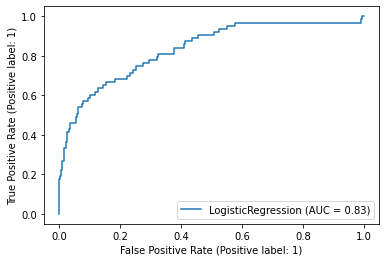

In [524]:
# Vorhersage der Test Daten mittels dem logistischen Regressionsmodell und Darstellung der AUC der ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_regressor, X_test, y_test)



### **Beschreiben und Interpretation der ermittelten Area Under Curve (AUC) der Receiver-Operator-Curve (ROC)**
Die AUC der ROC kann Werte zwischen 0.5 bis 1 annehmen. Erhält ein Klassifizierungsmodell einen Wert von 0.5 dann ist seine Klassifierung nicht besser als der Zufall (blaue Linie im obigen Bild würde der Gerade mit TPR=FPR entsprechen). Umso näher der Wert in Richtung 1 liegt desto trenngenauer kann der Klassifizierer die Klassen separieren. Der in unserem Modell vorliegende AUC Wert der ROC beträgt 0.83. Unser Logistisches Regressionsmodell kann daher  gut zwischen den Klassen Kreditablehnung und Kreditannahme separieren. [Mehr zur Einschätzung der AUC der ROC Werte](http://gim.unmc.edu/dxtests/RoC3.htm).

## e) Manche Methoden in scikit-learn haben den Parameter class_weight. Wann sollte man class_weight = 'balanced' setzen? Ist es in dieser Aufgabe nötig?

Im Rahmen der Datenanalyse und Exploration in Teilaufgabe a haben wir uns die Klassenverteilung des Targets angeschaut. Dabei ist uns aufegefallen, dass die Klassenverteilung stark unbalanciert ist. Genauer gesagt: Es gibt 2095 Beobachtungen mit der Target Klasse 0 (Kreditannahme) und 285 Beobachtungen mit der Target Klasse 1 (Kreditablehnung). Ein unbalancierter Datensatz kann bei manchen ML-Algorithmen zu schlechten Ergebnissen führen, da der Algorithmus zu wenig Sensitivität für die unterrepräsentierte Klasse erlernt. In unserem Fall sollte daher der Unbalancierung der Daten entgegengewirkt werden. Dies kann auf mehrere Arten erfolgen. Manche Methoden in scikit-learn verfügen über den Paramteter class_weight mit dem sich die Beobachtungen der unterrepräsentierten Klasse gewichten lassen um ihnen mehr Einfluss zu verschaffen. Dieser Parameter sollte in unserem Fall gesetzt werden. Wir setzten ihn jedoch explizit nicht und verändern stattdessen den Datensatz im Pre-Processing Schritt in Teilaufgabe d um der Unbalancierung entgegenzuwirken. Dieses Vorgehen ist begründet mit der Verwendung des statsmodels Modul um die Signifikanzniveaus der Koeffizienten zu bestimmen (Teilaufgabe d). Das statsmodels Modul verfügt nicht über eine äquivalente Methode um die class_weight Gewichtung wie in scikit-learn durchzuführen. Die Koeffizienten von scikit-learns und statsmodels logistischer Regression würden signifikant voneinander abweichen wenn statsmodels logistische Regression ohne class_weight Gewichtung durchgeführt werden würde. In Teilaufgabe c haben wir den Datensatz demnach mittels Oversampling auf eine gleichverteilte Klassenverteilung des Targets angepasst. Es gibt noch weitere Methoden eine gleichverteilte Klassenverteilung zu erreichen. Diese haben wir aber nicht weiter untersucht, da es in der Aufgabe nicht explizit gefordert war (es sei hierbei auf das Modul [imablanced-learn](https://imbalanced-learn.org/stable/) verwiesen). Generell ist noch zu sagen, dass sich in unserem konkreten Fall durch die Balancierung des Datensatzes keine signifikanten Unterschiede in der AUC der ROC der in Teilaufgabe f untersuchten Klassifizierungs Algorithmen ergibt.

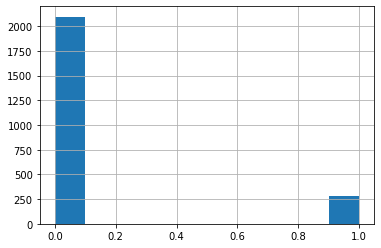

In [525]:
#Visualisierung der Klassenverteilung des Targets
y.hist()

In [526]:
# Berechnung der genauen Anzahl der Beobachtungen mit Target Klasse 0
y[y==0].count()

2095

In [527]:
# Berechnung der genauen Anzahl der Beobachtungen mit Target Klasse 1
y[y==1].count()

285

## e) Führen Sie die Klassifizierung anhand der unten genannten Methoden durch (ohne Optimierung der Parameter). Vergleichen Sie die Feature Importance von Decision Tree, Random Forest und AdaBoost mit der der logistischen Regression aus 4d). Sind Feature Importance, Koffizienten und log der Wahrscheinlichkeit eines Features einer Klasse (feature_log_prob_) direkt vergleichbar? Warum? Sagen Sie vorher, ob ein Kreditantrag im Test-Datensatz abgelehnt wird. Berechnen Sie die AUC der ROC. Beschreiben Sie Ihre Erkenntnisse.

## i. Baseline: Häufigste Klasse <br>
## ii. Decision Tree (criterion = 'entropy')<br>
## iii. Random Forest<br>
## iv. AdaBoost<br>
## v. Naive Bayes (bei scikit-learn, bitte   ComplementNB()benutzen)<br>
## vi. SVM (lineare Kernel)<br>

### **Trainieren der verschiedenen Klassifizierungs Algorithmen i. bis vi.**

In [528]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy')
decisiontree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [529]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [530]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [531]:
from sklearn.naive_bayes import ComplementNB
naivebayes_classifier = ComplementNB()
naivebayes_classifier.fit(X_train, y_train)

ComplementNB()

In [532]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC() #class_weight ="balanced"
svm_classifier.fit(X_train, y_train)

LinearSVC()

Die mit Abstand am häufigsten vorkommende Klasse der Target Variable **deny** ist 0 (Kreditannahme) (siehe Histogram). Daher werden wir für die Baseline Vorhersage für jede der Beobachtungen in x_test deny=0 vorhersagen mit einer Wahrscheinlichkeit von 88%.


In [533]:
y_prediction_häufigsteKlasse = [0 for i in range(y_test.count())]

Kreditannahmewahrscheinlichkeit_häufigsteKlasse = y[y==0].count()/y.count()
Kreditannahmewahrscheinlichkeit_häufigsteKlasse



0.8802521008403361

### **Beschreibung der AUC der ROC der Klassifizierer i. bis vi.**

Alle unsere Klassifizierungsmodelle performen deutlich besser als die definierte Baseline und lieferen gute Ergebnisse. Das Logistische Regressions Model, die Lineare SVC, der AdaBoost Klassifizierer und der Random Forest Klassifizierer liefern AUC Werte von mehr als 0.8. Das Naive Bayes Modell und der Decision Tree Klasifizierer liefern AUC Werte von mehr als 0.7. Damit ist die Feature Wichtigkeitsanalyse relativ valide, da diese ein gut performendes Model vorraussetzt.

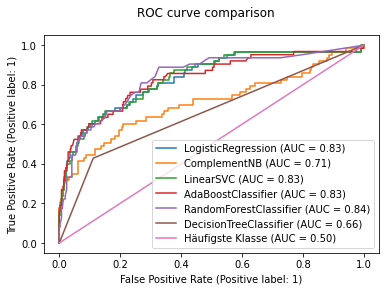

In [534]:
# Darstellung der AUC der ROC der zu obigen Klassifizierer 

fig = RocCurveDisplay.from_estimator(log_regressor, X_test, y_test)
fig = RocCurveDisplay.from_estimator(naivebayes_classifier, X_test, y_test, ax = fig.ax_)
fig = RocCurveDisplay.from_estimator(svm_classifier, X_test, y_test, ax = fig.ax_)
fig = RocCurveDisplay.from_estimator(adaboost_classifier, X_test, y_test, ax = fig.ax_)
fig = RocCurveDisplay.from_estimator(randomforest_classifier, X_test, y_test, ax = fig.ax_)
fig = RocCurveDisplay.from_estimator(decisiontree_classifier, X_test, y_test, ax = fig.ax_)
fig = RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_prediction_häufigsteKlasse, name="Häufigste Klasse", ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

### **Vergleichbarkeit der Feature Wichtigkeits bestimmenden Metriken: Feature Importance, Koeffizienten der logistischen Regression und log der Wahrscheinlichkeiten eines Features des Naive Bayes**

Wie wir in den vorrangegangen Teilaufgaben gesehen haben bemessen alle oben beschriebenen Methoden die Wichtigkeit der einzelnen Features auf eine andere Art unter Berücksichtigung der Funktionsweise der einzelenen Algorithmen.
Die Wichtigkeit der Features bei der logistischen Regression wird beispielsweise durch die Größe der Koeffizienten des logistischen Regressionsmodell dargestellt. Der Vergleich mit dem feature_importances_ Attribut der Baumbasierten Algorithmen oder mit dem log der Wahrscheinlichkeiten eines Features des Naive Bayes Modells basiert demnach nicht auf dem selben Maßstab und kann daher nicht in quantiativer Weise erfolgen. Allerdings ist es möglich die relative Wichtigkeit der Feature zu vergleichen.


In [535]:
#Erstellung eines DataFrames welches alle Feature Wichtigkeitsmetriken der zu betrachtenden Algorithmen enthält
FeatureWichtigkeit_Klassifizierer = [decisiontree_classifier.feature_importances_, randomforest_classifier.feature_importances_, adaboost_classifier.feature_importances_, log_regressor.coef_.flatten()]
FeatureWichtigkeit_Klassifizierer_name = ["DecisionTree_Feature_Importance", "RandomForest_Feature_Importance", "AdaBoost_Feature_Importance", "LogistischeRegression_Koeffizienten"]
FeatureWichtigkeit_df = pd.DataFrame(FeatureWichtigkeit_Klassifizierer, columns=X.columns, index = FeatureWichtigkeit_Klassifizierer_name)
FeatureWichtigkeit_df = FeatureWichtigkeit_df.T


### **Vergleich der Baumbasierten Modelle (Decision Tree, Random Forest und AdaBoost)**
Random Forests und der nicht parametrisierte AdaBoost Algorithmus in sklearn beruhen im Kern auf Decision Tree Algorithmen. Daher kann man wie in Teilaufgabe b) beschrieben die Feature Importance bei diesen drei ALG mit dem Attribut feature_importances_ aus den Modellen ausgeben lassen. 

Die Feature Importance bei unserem Random Forest Model (RFM) und dem Decision Tree Model (DTM) ist ziemlich ähnlich. Da die AUC der ROC für das Random Forest Modell deutlich besser ist als für das Decision Tree Model kann man den Feature Importances des Random Forest Models mehr Güte zuschreiben. Das AdaBoost Model zeigt mehr Varianz in den Feature Importances gegenüber dem RFM und dem DTM. Dies könnte dadurch erklärbar sein, dass AdaBoost speziell die schwierigeren Klassifikationsbeobachtungen verstärkt und daher mehr Varianz in den Feature Importances zeigt, denn alle Feature Importances lassen sich zu eins aufsummieren.
  :Ausreißer AdaBoost size_of_loan ❌ Auch hiermit lassen sich gute Ergebnisse erzielen.

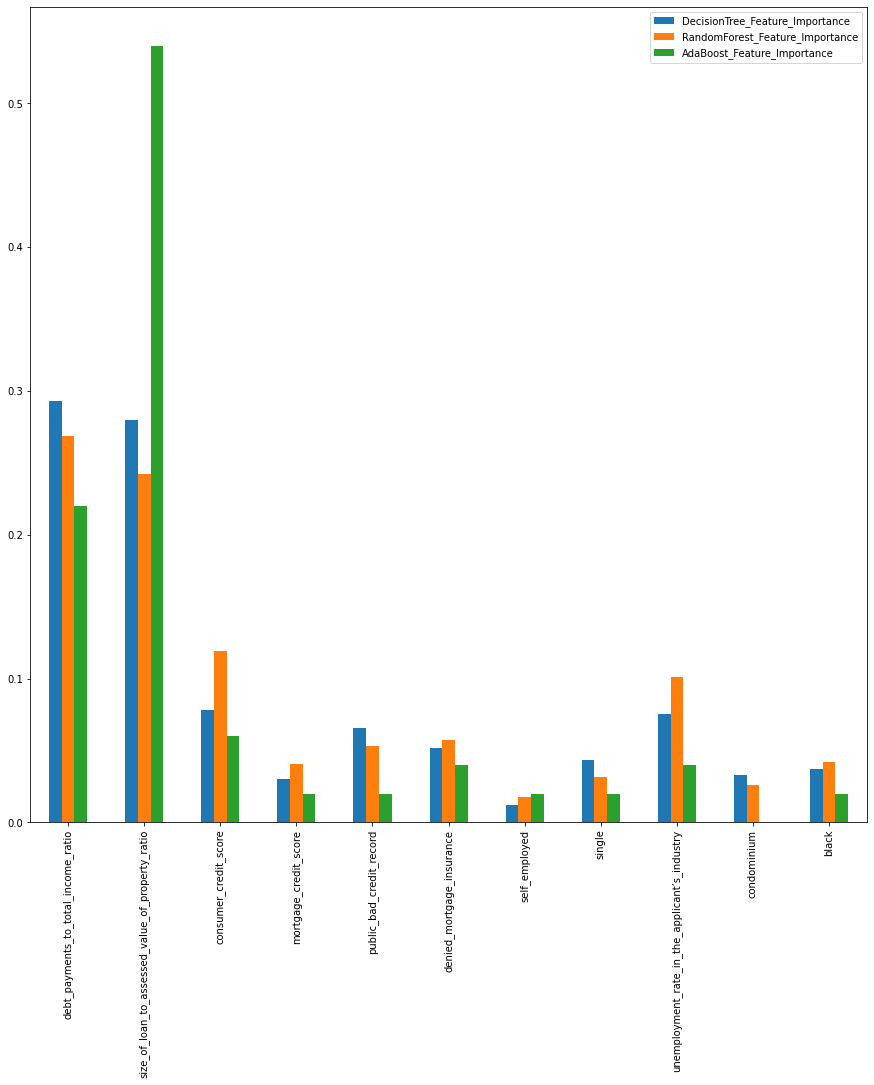

In [536]:
# Balkendiagramm geplottet, welches die Feature Importances von den drei Baumbasierten Algorithmen zeigt
FeatureWichtigkeit_df[["DecisionTree_Feature_Importance", "RandomForest_Feature_Importance", "AdaBoost_Feature_Importance"]].plot.bar(figsize=(15,15))

### **Relativer Vergleich der Feature Wichtigkeit der Baumbasierten Modelle mit dem logistischen Regressionsmodell**

Beschreiben warum auf Random Forest fokussiert wird. ❌

In den unteren Darstellungen des relativen Vergleichs der Feature Wichtigkeit der Baumbasierten Modelle mit dem logistischen Modell wird erkenntlich, dass das Einflussreichste Feature in beiden


Die relative Wichtigkeit der einzelenen Attribute ist unterschiedlich zwischen der logistischen Regression und den Decision Tree ALG. Beispielweise hat das Attribut **size_of_loan_to_assessed_value_of_property_ratio** die höchste Wichtigkeit unter den Decision Tree ALG hat allerdings nur die dritt höchste Wichtigkeit im Logistischen Regressionsmodell. 

In [542]:
# Darstellung der Feature Wichtigkeiten der Baumbasierten Modell und des logistischen Regressionsmodell sortiert in absteigender Abfolge nach den Feature Wichtigkeiten des RandomForest
FeatureWichtigkeit_df.sort_values(by="RandomForest_Feature_Importance", ascending=False)

,DecisionTree_Feature_Importance,RandomForest_Feature_Importance,AdaBoost_Feature_Importance,LogistischeRegression_Koeffizienten
debt_payments_to_total_income_ratio,0.293316,0.268912,0.22,14.065557
size_of_loan_to_assessed_value_of_property_ratio,0.279838,0.242165,0.54,2.263460
consumer_credit_score,0.078188,0.118927,0.06,1.389842
unemployment_rate_in_the_applicant’s_industry,0.075513,0.101416,0.04,0.462662
denied_mortgage_insurance,0.051736,0.057433,0.04,4.262458
public_bad_credit_record,0.065746,0.052999,0.02,1.418400
black,0.037186,0.042238,0.02,0.967852
mortgage_credit_score,0.030068,0.040396,0.02,0.416445
single,0.043749,0.031757,0.02,0.573102
condominium,0.032777,0.026167,0.00,0.042494


In [541]:
# Kreierung eines DataFrames, welches die Wichtigkeit der einzelnen Features der Baumbasierten und des logistischen Regressionsmodells in absteigender Reinfolge darstellt
FeaturesNachWichtigkeitGeordnet_DecisionTree = list(FeatureWichtigkeit_df.sort_values(by="DecisionTree_Feature_Importance", ascending=False).index)
FeaturesNachWichtigkeitGeordnet_RandomForest = list(FeatureWichtigkeit_df.sort_values(by="RandomForest_Feature_Importance", ascending=False).index)
FeaturesNachWichtigkeitGeordnet_AdaBoost = list(FeatureWichtigkeit_df.sort_values(by="AdaBoost_Feature_Importance", ascending=False).index)
FeaturesNachWichtigkeitGeordnet_LogistischeRegression = list(FeatureWichtigkeit_df.sort_values(by="LogistischeRegression_Koeffizienten", ascending=False).index)

FeaturesNachWichtigkeitGeordnet_df = pd.DataFrame(data=[FeaturesNachWichtigkeitGeordnet_RandomForest, FeaturesNachWichtigkeitGeordnet_LogistischeRegression], columns=["Rang "+str(Rang +1) for Rang in range(len(X.columns))], index = ["RandomForest_Feature_Importance"	,"LogistischeRegression_Koeffizienten"]).T
FeaturesNachWichtigkeitGeordnet_df

,RandomForest_Feature_Importance,LogistischeRegression_Koeffizienten
Rang 1,debt_payments_to_total_income_ratio,debt_payments_to_total_income_ratio
Rang 2,size_of_loan_to_assessed_value_of_property_ratio,denied_mortgage_insurance
Rang 3,consumer_credit_score,size_of_loan_to_assessed_value_of_property_ratio
Rang 4,unemployment_rate_in_the_applicant’s_industry,public_bad_credit_record
Rang 5,denied_mortgage_insurance,consumer_credit_score
Rang 6,public_bad_credit_record,black
Rang 7,black,single
Rang 8,mortgage_credit_score,unemployment_rate_in_the_applicant’s_industry
Rang 9,single,self_employed
Rang 10,condominium,mortgage_credit_score


### Für Folien
unser Modell perfomrt schlecht weil nicht auf class_imbalance eingegangen wurde, von einem schlecht performenden Modell ausgehend können auch keine validen Schlüsse auf Feature Importances gezogen werden

Performance von Logit wird besser durch class_weight balance

Decision Tree und Random Forest schlechter um ca. 0.05 AUC Punkte

AdaBosst hat kein class_weight Attribut

Naive Bayes ComplementNB ist speziell für Imbalanced Data ausgelegt

SVM verbessert sich mit class_weight balanced um 0.10 AUC Punkte

## Noch erledigen
1. Statsmodel mit class_weight implementieren so wie für sklearn, wie geht das?
2. Die Ideen aus One Note von den Präsis der anderen Gruppen mit in die Aufgabe aufnehmen

In [539]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'warnings', 're', 'enum', 'types', '_collections', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'functools', '_functools', 'collections', '_collections_abc', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', 'copyreg', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 'ipykernel